# Credit Card Application

To create a model that forecasts the propensity (probability) of customers responding to a personal loan campaign, we will utilize logistic regression. The outcomes will be categorized and the factors influencing the answer will be found using the model's probability. Building a model that identifies clients who are most likely to accept the loan offer in upcoming personal loan campaigns is the objective.

### 1) Importing required libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

### 2) Importing and Descriptive Stats

To market their loan products to people who already have deposit accounts, BankABC wants to create a direct marketing channel. To cross-sell personal loans to its current clients, the bank ran a test campaign. An enticing personal loan offer and processing charge waiver were aimed at a random group of 20000 clients. The targeted clients' information has been provided, together with information on how they responded to the marketing offer.

In [15]:
# READ DATA
#I had to change it into a csv due to issues arriving from the file not working as xlsx, but that does break formatting later I believe
data = pd.read_csv("/Users/vedant/Downloads/Approval.csv") 
data.shape  

data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [22]:
# GETTING THE DIMENSIONS OF THE ARRAY
rows, columns = data.shape
print("rows:", rows)
print("columns:", columns)

rows: 690
columns: 16


In [51]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)        

# Print the first 15 rows of the DataFrame with better formatting
print(data.head(15).to_string(index=False))

 Gender   Age   Debt  Married  BankCustomer              Industry Ethnicity  YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense      Citizen  ZipCode  Income  Approved
      1 30.83  0.000        1             1           Industrials     White          1.250             1         1            1               0      ByBirth      202       0         1
      0 58.67  4.460        1             1             Materials     Black          3.040             1         1            6               0      ByBirth       43     560         1
      0 24.50  0.500        1             1             Materials     Black          1.500             1         0            0               0      ByBirth      280     824         1
      1 27.83  1.540        1             1           Industrials     White          3.750             1         1            5               1      ByBirth      100       3         1
      1 20.17  5.625        1             1           Industrials     White     

In [49]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
print(data.tail(5))

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [6]:
# DESCRIPTIVE STATS - This data shows us the columns and that every row has a non-null answer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    float64
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    float64
 4   BankCustomer    690 non-null    float64
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    float64
 9   Employed        690 non-null    float64
 10  CreditScore     690 non-null    float64
 11  DriversLicense  690 non-null    float64
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    float64
 14  Income          690 non-null    float64
 15  Approved        690 non-null    float64
dtypes: float64(13), object(3)
memory usage: 86.4+ KB


In [44]:
data.describe()
#These stats provide us with valuable insights into the data's central tendency, spread, and distribution.

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


## 3) Handling Missing Values

In [54]:
#checking for null values. We see that each column has no nulls and everything is filled out
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [58]:
#IMPUTE MISSING VALUES

#for numeric data using mean. Our data has no nulls 
#If there was a null with numeric data, we would fill it in with the average of that column in the set
for val in data:
    if data[val].dtypes == 'numeric':
        # Impute with the most frequent value
        column_means = data.mean()
        data.fillna(column_means, inplace=True)

# For non numeric data using mode, our data has no nulls
#If there was a null with data from 
for val in data:
    # Check if the column is of object type
    if data[val].dtypes == 'object':
        # Impute with the most frequent value
        data = data.fillna(data[val].value_counts().index[0])

In [10]:
data.head(10)
#this is to check if the imputed missing values work

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1.0,30.83,0.000,1.0,1.0,Industrials,White,1.250,1.0,1.0,1.0,0.0,ByBirth,202.0,0.0,1.0
1,0.0,58.67,4.460,1.0,1.0,Materials,Black,3.040,1.0,1.0,6.0,0.0,ByBirth,43.0,560.0,1.0
2,0.0,24.50,0.500,1.0,1.0,Materials,Black,1.500,1.0,0.0,0.0,0.0,ByBirth,280.0,824.0,1.0
3,1.0,27.83,1.540,1.0,1.0,Industrials,White,3.750,1.0,1.0,5.0,1.0,ByBirth,100.0,3.0,1.0
4,1.0,20.17,5.625,1.0,1.0,Industrials,White,1.710,1.0,0.0,0.0,0.0,ByOtherMeans,120.0,0.0,1.0
5,1.0,32.08,4.000,1.0,1.0,CommunicationServices,White,2.500,1.0,0.0,0.0,1.0,ByBirth,360.0,0.0,1.0
6,1.0,33.17,1.040,1.0,1.0,Transport,Black,6.500,1.0,0.0,0.0,1.0,ByBirth,164.0,31285.0,1.0
7,0.0,22.92,11.585,1.0,1.0,InformationTechnology,White,0.040,1.0,0.0,0.0,0.0,ByBirth,80.0,1349.0,1.0
8,1.0,54.42,0.500,0.0,0.0,Financials,Black,3.960,1.0,0.0,0.0,0.0,ByBirth,180.0,314.0,1.0
9,1.0,42.50,4.915,0.0,0.0,Industrials,White,3.165,1.0,0.0,0.0,1.0,ByBirth,52.0,1442.0,1.0


## 4) Data Pre-processing

In [59]:
#Converting all non-numeric data to numeric - using label encoding
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()

for val in data:
    # Compare if the dtype is object
    if data[val].dtypes=='object':
        data[val]=le.fit_transform(data[val])
        
#you can also use one-hot encoding and try building the model
#Converting non-numeric data to numeric enables data analysis and machine learning algorithms that only work with numeric inputs expanding the range of applicable methods.

In [60]:
data.head(10)
#this checks if the conversion succeded

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.250,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.040,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.500,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.750,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.710,1,0,0,0,1,120,0,1
5,1,32.08,4.000,1,1,0,4,2.500,1,0,0,1,0,360,0,1
6,1,33.17,1.040,1,1,12,1,6.500,1,0,0,1,0,164,31285,1
7,0,22.92,11.585,1,1,8,4,0.040,1,0,0,0,0,80,1349,1
8,1,54.42,0.500,0,0,5,1,3.960,1,0,0,0,0,180,314,1
9,1,42.50,4.915,0,0,7,4,3.165,1,0,0,1,0,52,1442,1


/var/folders/yy/mx9fzt217dqckjcglk6tbfv80000gn/T/ipykernel_73285/1017638797.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, bins = 30)


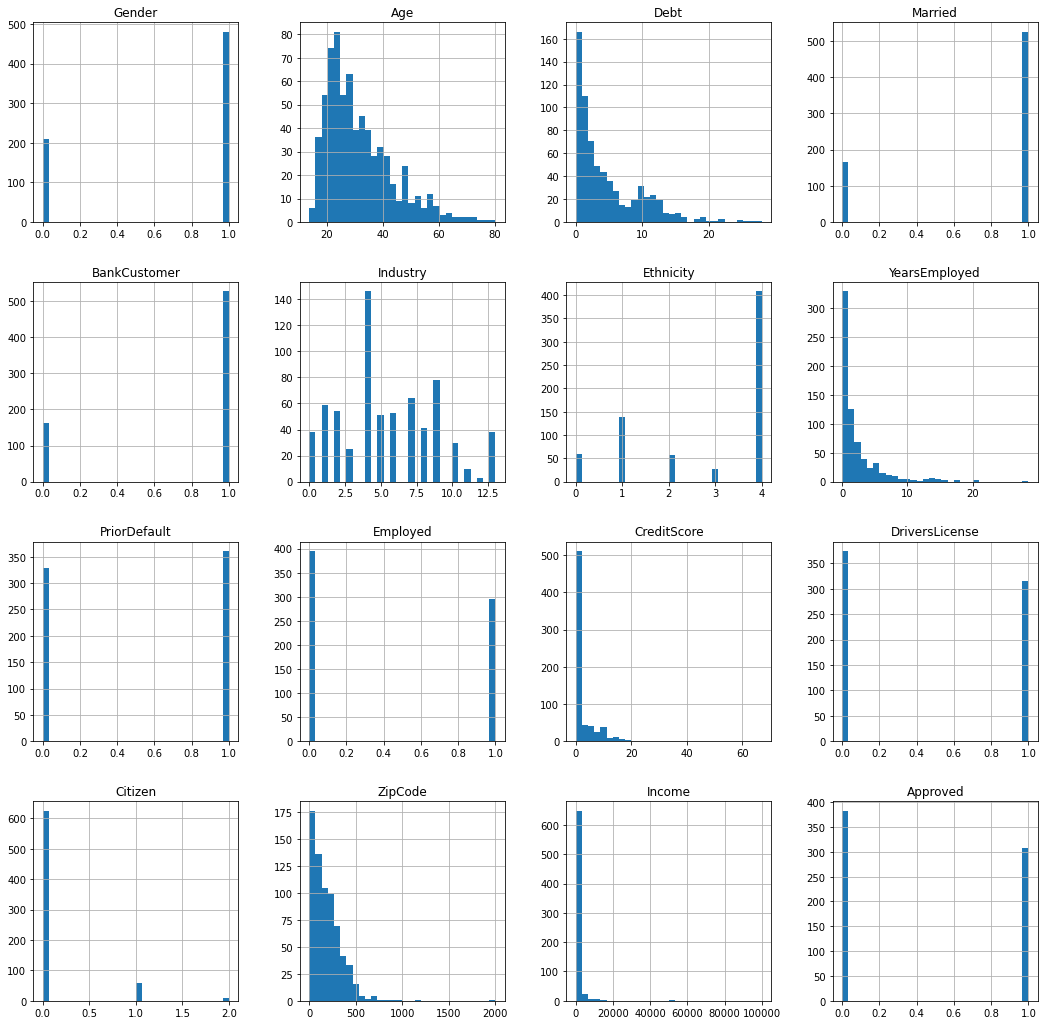

In [13]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
data.hist(ax=ax, bins = 30)
plt.show()
# Histograms allow us to visualize our data and apply it for our uses.

In [64]:
# CREATING A COPY TO RETAIN THE NUMERICAL INFORMATION OF THE DATA AS WE CHANGE THE 0 AND 1 TO
# 'DID NOT RESPOND' AND 'RESPONDED'

###
data1 = data.copy()
### Backing up our data ensures nothing will be lost if something goes wrong.

In [15]:
# RENAMING THE 0 AND 1 TO 'NOT APPROVED' AND 'APPROVED' RESPECTIVELY
#there is a big error which I don't understand when running this
data1.loc[:, 'a'] = data.loc[:, 'approved'].apply(lambda x: 'admitted' if x == 1 else 'not approved')

In [72]:
data.head(20)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.250,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.040,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.500,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.750,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.710,1,0,0,0,1,120,0,1
5,1,32.08,4.000,1,1,0,4,2.500,1,0,0,1,0,360,0,1
6,1,33.17,1.040,1,1,12,1,6.500,1,0,0,1,0,164,31285,1
7,0,22.92,11.585,1,1,8,4,0.040,1,0,0,0,0,80,1349,1
8,1,54.42,0.500,0,0,5,1,3.960,1,0,0,0,0,180,314,1
9,1,42.50,4.915,0,0,7,4,3.165,1,0,0,1,0,52,1442,1


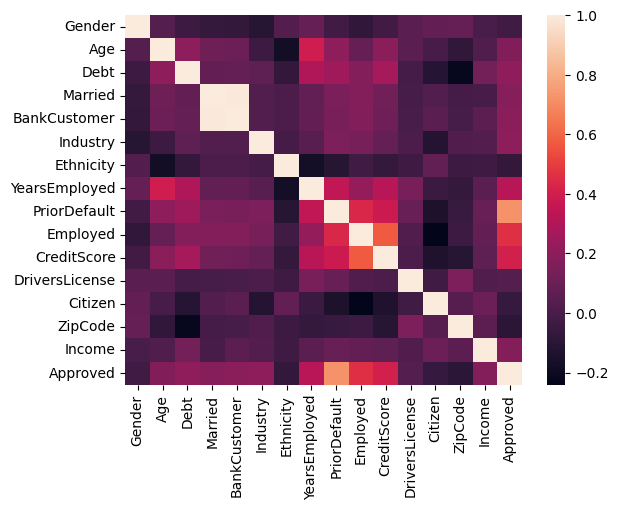

In [77]:
# # calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr)

# Display the plot
plt.show()

## 5) Model Building

Now, we divide our data into sets for training and testing. This procedure is carried out to get our data ready for the training and testing phases of machine learning modeling. In theory, a machine learning model's training process shouldn't be guided by information from the test data or scaled from the test data. For this model, we'll split the costs 70/30. DriversLicense and ZipCode information are not as crucial for credit card approval prediction as the other features in the dataset. To determine the best set of characteristics, we should drop them. This is the feature selection procedure.

In [78]:
from sklearn.model_selection import train_test_split

#drop variables not needed
cto = ['DriversLicense', 'ZipCode']

# Drop the specified columns from the DataFrame
data.drop(cto, axis=1, inplace=True)
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,0,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,1,0,1


In [85]:
# Segregate features and labels into separate variables
#for clarity
from sklearn.model_selection import train_test_split
X,y = data[:,0:13] , data[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
#I am getting an error I am not able to understand and due to this I can't answer the rest of the questions
#error message is very long and has something to do with casted_key

InvalidIndexError: (slice(None, None, None), slice(0, 13, None))

Scaling our data to a consistent range. As a practical illustration of how scaling functions, let's utilize CreditScore. The ability of a person to pay off credit card debt is determined by their credit score. A person is regarded as being more financially trustworthy if this number is greater. As a result, a CreditScore of 1 is the greatest since all values will be scaled to fall between 0 and 1.

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# you can try to do z-score normalization (look it up!)
#I tried and couldn't get it to work due to previous error

The dataset has more occurrences that match the "Not Approved" category than instances that match the "Approved" condition, according to UCI. In particular, out of 690 cases, 383 (55.5%) applications were turned down and 307 (44.5%) were approved. Our results should statistically agree with these results in order to create a sound model. 
The hardest aspect of the machine learning process is deciding which model will best answer our business question. Do the features exhibit linear relationship with one another, for example? These are important questions to ask regarding our data. We can see from this data's correlation analysis that our characteristics are correlated, thus we can use a generalized linear model to forecast our outcome variable.

In [84]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit model to the train set
logreg.fit(rescaledX_train, y_train)

NameError: name 'rescaledX_train' is not defined

In [22]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0,warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

We will now assess the classification accuracy of our model using the test set. It is crucial to check whether our machine learning model can accurately forecast whether applications that were first denied would ultimately be approved. This is the case when predicting credit card applications. Our algorithm can end up approving an application that shouldn't have been authorized if it doesn't do well in this area. Finding the misclassification rate of our model is a useful task that may be accomplished by using a confusion matrix to determine our false positives and negatives.

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

#A higher accuracy score indicates that the model is making more accurate predictions on the test data

Accuracy of logistic regression classifier:  0.8405797101449275


array([[87, 23],
       [10, 87]])

The accuracy score and confusion matrix are displayed in the result above. We can see that with a prediction rate of roughly 84 percent, we did fairly well! However, we may still improve the accuracy of our model using additional methods.

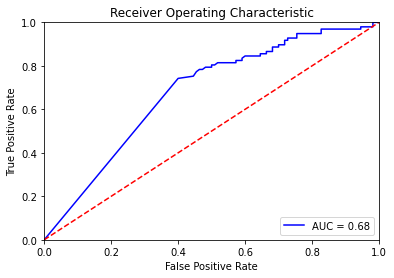

In [24]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

#The data has a moderate level of discrimination power in distinguishing between the positive and negative classes with AUC = .68. The higher the score the better.